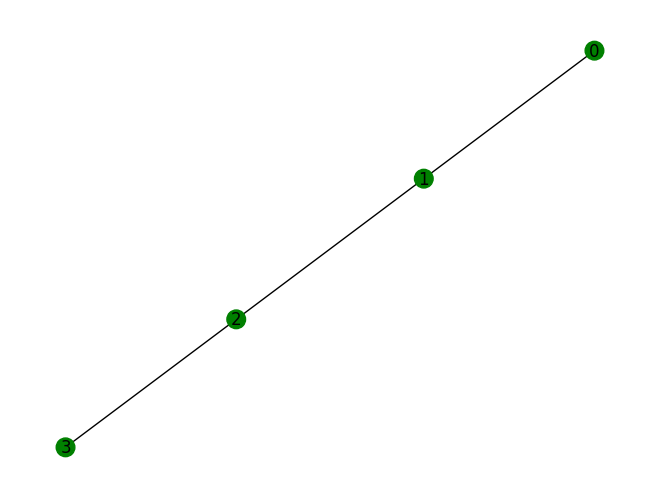

Source nodes: [3]
Source nodes: [2]
Source nodes: [1]
Source nodes: [0]
Source nodes: [2]
Source nodes: [2]
Source nodes: [2]
Source nodes: [1]
Source nodes: [0]
Source nodes: [3]
Source nodes: [0]
Source nodes: [3]
Source nodes: [1]
Source nodes: [0]
Source nodes: [2]
Source nodes: [1]
Source nodes: [2]
Source nodes: [3]
Source nodes: [3]
Source nodes: [0]
Source nodes: [3]
Source nodes: [3]
Source nodes: [1]
Source nodes: [1]
Source nodes: [2]
Source nodes: [3]
Source nodes: [1]
Source nodes: [0]
Source nodes: [2]
Source nodes: [3]
Source nodes: [1]
Source nodes: [2]
Source nodes: [2]
Source nodes: [0]
Source nodes: [2]
Source nodes: [0]
Source nodes: [1]
Source nodes: [2]
Source nodes: [1]
Source nodes: [0]
Source nodes: [2]
Source nodes: [3]
Source nodes: [2]
Source nodes: [0]
Source nodes: [0]
Source nodes: [3]
Source nodes: [1]
Initial Cost:  195


In [3]:
from disqco.circuits.cp_fraction import cp_fraction, cz_fraction
from disqco.graphs.GCP_hypergraph import QuantumCircuitHyperGraph
from disqco.graphs.hypergraph_methods import calculate_full_cost_hetero
from qiskit import transpile
from disqco.parti.FM.FM_methods import set_initial_partitions
from disqco.circuits.QAOA import QAOA_random
from qiskit.circuit.library import QFT
import pickle

num_qubits = 32

# circuit = QAOA_random(num_qubits, prob = 0.5, reps = 1)
# circuit = QFT(num_qubits,do_swaps = False)

# circuit = cp_fraction(  num_qubits=num_qubits,
#                         depth=num_qubits,
#                         fraction= 0.5)

import pickle 

# with open("circuit.pkl", "wb") as f:
#     pickle.dump(circuit, f)

with open("circuit.pkl", "rb") as f:
    circuit = pickle.load(f)

# circuit = cz_fraction(  num_qubits=num_qubits,
                        # depth=num_qubits,
                        # fraction= 0.5)


circuit = transpile(circuit, basis_gates = ['cp', 'u'])
depth = circuit.depth()



num_partitions = 4


qpu_sizes = [int(circuit.num_qubits/num_partitions)+1]*num_partitions


coupling = [[i, i+1] for i in range(num_partitions-1)]

# coupling = None
from disqco.graphs.quantum_network import QuantumNetwork

network = QuantumNetwork(qpu_sizes, coupling)

network.draw()


graph = QuantumCircuitHyperGraph(circuit, group_gates = True, anti_diag = True)


assignment = set_initial_partitions(network, num_qubits, depth, num_partitions)

initial_cost = calculate_full_cost_hetero(hypergraph=graph, assignment=assignment, num_partitions=num_partitions, costs = {}, network=network)

print("Initial Cost: ", initial_cost)

In [4]:
from disqco.parti.FM.FM_methods import get_all_configs, get_all_costs_hetero


all_configs = [(0,0,1,1),
              (0,1,0,1),
              (1,0,0,1),
              (1,1,0,0),
              (0,0,1,0),
              (1,0,1,0),
              (0,1,0,0),
              (1,1,1,1)]
all_costs = get_all_costs_hetero(network, all_configs)

Source nodes: [2, 3]
Source nodes: [2, 3]
Source nodes: [2, 3]
Source nodes: [2, 3]
Source nodes: [2, 3]
Source nodes: [2, 3]
Source nodes: [2, 3]
Source nodes: [2, 3]
Source nodes: [1, 2, 3]
Source nodes: [1, 2, 3]
Source nodes: [1, 2, 3]
Source nodes: [1, 2, 3]
Source nodes: [1, 2, 3]
Source nodes: [1, 2, 3]
Source nodes: [1, 2, 3]
Source nodes: [1, 2, 3]
Source nodes: [0, 1, 2, 3]
Source nodes: [0, 1, 2, 3]
Source nodes: [0, 1, 2, 3]
Source nodes: [0, 1, 2, 3]
Source nodes: [0, 1, 2, 3]
Source nodes: [0, 1, 2, 3]
Source nodes: [0, 1, 2, 3]
Source nodes: [0, 1, 2, 3]
Source nodes: [0, 1]
Source nodes: [0, 1]
Source nodes: [0, 1]
Source nodes: [0, 1]
Source nodes: [0, 1]
Source nodes: [0, 1]
Source nodes: [0, 1]
Source nodes: [0, 1]
Source nodes: [2]
Source nodes: [2]
Source nodes: [2]
Source nodes: [2]
Source nodes: [2]
Source nodes: [2]
Source nodes: [2]
Source nodes: [2]
Source nodes: [0, 1, 2]
Source nodes: [0, 1, 2]
Source nodes: [0, 1, 2]
Source nodes: [0, 1, 2]
Source nodes: [0